This notebook uses the complete_dataset to analyze the payment type information

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
files=os.listdir('../analysis_data')
files

['census_and_fare',
 'census_and_trips',
 'census_data.csv',
 'community.csv',
 'community_final.csv',
 'comm_area.csv',
 'dropoff_final.csv',
 'dropoff_geoloc.csv',
 'Fare.csv',
 'p1.csv',
 'payment.csv',
 'pickup.csv',
 'pickup_census.csv',
 'pickup_geoloc.csv',
 'time.csv']

In [5]:
file=pd.read_csv('../analysis_data/{}'.format(files[10]))
df=pd.DataFrame(file)
df.head()

,Unnamed: 0,Trip Start Timestamp,Payment Type,Trip Count,Mean Fare
0,0,01/01/2013 01:00:00 AM,Cash,29,9.063103
1,1,01/01/2013 01:00:00 AM,Credit Card,2,10.050000
2,2,01/01/2013 01:00:00 PM,Cash,7,8.734286
3,3,01/01/2013 01:00:00 PM,Credit Card,5,12.050000
4,4,01/01/2013 01:15:00 AM,Cash,27,8.701852


In [6]:
df1=df[['Trip Start Timestamp','Payment Type','Trip Count']]
gb=df1.groupby('Trip Start Timestamp')
trip_count=gb['Trip Count'].sum().reset_index()
trip_count.head()

,Trip Start Timestamp,Trip Count
0,01/01/2013 01:00:00 AM,1235
1,01/01/2013 01:00:00 PM,414
2,01/01/2013 01:15:00 AM,1574
3,01/01/2013 01:15:00 PM,417
4,01/01/2013 01:30:00 AM,1912


In [7]:
trip_count['Trip Start Timestamp']=trip_count['Trip Start Timestamp'].str.split(" ", n = 1, expand = True)

In [8]:
trip_count['Trip Start Timestamp']=pd.to_datetime(trip_count['Trip Start Timestamp'],yearfirst=True)
trip_count['Months']=trip_count['Trip Start Timestamp'].dt.to_period('M')
trip_count.head()

,Trip Start Timestamp,Trip Count,Months
0,2013-01-01,1235,2013-01
1,2013-01-01,414,2013-01
2,2013-01-01,1574,2013-01
3,2013-01-01,417,2013-01
4,2013-01-01,1912,2013-01


In [9]:
gb2=trip_count[['Trip Count','Months']].groupby('Months')
trip_final=gb2.sum().reset_index()
trip_final.head()

,Months,Trip Count
0,2013-01,1590060
1,2013-02,1800396
2,2013-03,2261368
3,2013-04,2116550
4,2013-05,2260958


In [10]:
gb3=df1.groupby(['Trip Start Timestamp','Payment Type'])
p1=gb3.sum().reset_index()

In [11]:
p1['Trip Start Timestamp']=pd.to_datetime(p1['Trip Start Timestamp'],yearfirst=True)
p1['Months']=p1['Trip Start Timestamp'].dt.to_period('M')
p1.head()

,Trip Start Timestamp,Payment Type,Trip Count,Months
0,2013-01-01 01:00:00,Cash,1056,2013-01
1,2013-01-01 01:00:00,Credit Card,171,2013-01
2,2013-01-01 01:00:00,Dispute,3,2013-01
3,2013-01-01 01:00:00,No Charge,5,2013-01
4,2013-01-01 13:00:00,Cash,307,2013-01


In [12]:
gb4=p1[['Payment Type','Months','Trip Count']].groupby(['Months','Payment Type'])
p2=gb4.sum().reset_index()
p2.head(10)

,Months,Payment Type,Trip Count
0,2013-01,Cash,1186712
1,2013-01,Credit Card,385680
2,2013-01,Dispute,1396
3,2013-01,No Charge,13565
4,2013-01,Pcard,714
5,2013-01,Unknown,1993
6,2013-02,Cash,1252127
7,2013-02,Credit Card,513753
8,2013-02,Dispute,1297
9,2013-02,No Charge,17664


In [13]:
test=p2.loc[(p2['Payment Type'] == 'Credit Card') | (p2['Payment Type']== 'Cash')]
test.head()

,Months,Payment Type,Trip Count
0,2013-01,Cash,1186712
1,2013-01,Credit Card,385680
6,2013-02,Cash,1252127
7,2013-02,Credit Card,513753
12,2013-03,Cash,1535322


In [14]:
test.set_index("Months", inplace=True)
trip_final.set_index('Months', inplace=True)
test['Total Trips']=trip_final['Trip Count']

C:\Users\nilay\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
test.head()

,Payment Type,Trip Count,Total Trips
Months,,,
2013-01,Cash,1186712,1590060
2013-01,Credit Card,385680,1590060
2013-02,Cash,1252127,1800396
2013-02,Credit Card,513753,1800396
2013-03,Cash,1535322,2261368


In [16]:
test['Percent']=round(test['Trip Count']/test['Total Trips']*100,2)
test.head()

C:\Users\nilay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Payment Type,Trip Count,Total Trips,Percent
Months,,,,
2013-01,Cash,1186712,1590060,74.63
2013-01,Credit Card,385680,1590060,24.26
2013-02,Cash,1252127,1800396,69.55
2013-02,Credit Card,513753,1800396,28.54
2013-03,Cash,1535322,2261368,67.89


In [24]:
final_df=test[['Payment Type','Percent']].reset_index()
final_df

,Months,Payment Type,Percent
0,2013-01,Cash,74.63
1,2013-01,Credit Card,24.26
2,2013-02,Cash,69.55
3,2013-02,Credit Card,28.54
4,2013-03,Cash,67.89
5,2013-03,Credit Card,28.64
6,2013-04,Cash,68.83
7,2013-04,Credit Card,29.94
8,2013-05,Cash,68.44
9,2013-05,Credit Card,30.03


In [37]:
x_cash=final_df['Months'].loc[final_df['Payment Type']=='Cash'].astype(str)
y_cash=final_df['Percent'].loc[final_df['Payment Type']=='Cash']
x_credit=final_df['Months'].loc[final_df['Payment Type']=='Credit Card'].astype(str)
y_credit=final_df['Percent'].loc[final_df['Payment Type']=='Credit Card']
x_ticks=['2013','','','','','','','','','','','',
        '2014','','','','','','','','','','','',
         '2015','','','','','','','','','','','',
         '2016','','','','','','','','','','','',
         '2017','','','','','','','']
         
#          'Jan-14','Feb-14','Mar-14','Apr-14','May-14','Jun-14','Jul-14','Aug-14','Sep-14','Oct-14','Nov-14','Dec-14',
#         'Jan-15','Feb-15','Mar-15','Apr-15','May-15','Jun-15','Jul-15','Aug-15','Sep-15','Oct-15','Nov-15','Dec-15',
#         'Jan-16','Feb-16','Mar-16','Apr-16','May-16','Jun-16','Jul-16','Aug-16','Sep-16','Oct-16','Nov-16','Dec-16',
#         'Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-13']

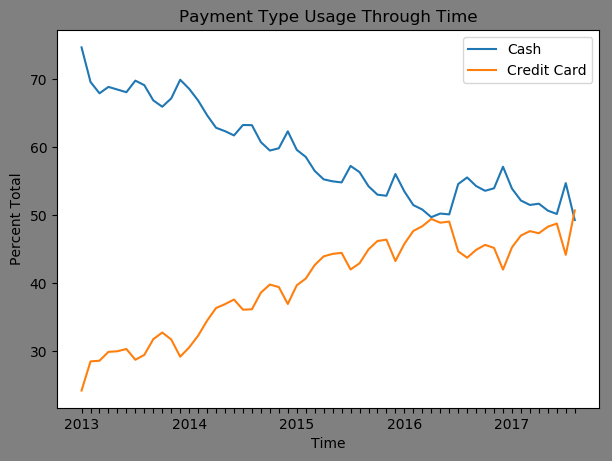

In [42]:
fig = plt.figure(figsize=(7,5),facecolor='gray',edgecolor='b',dpi=100)
ax = fig.add_subplot(111)
ax.plot(x_cash,y_cash)
ax.plot(x_credit,y_credit)
plt.xlabel('Time')
plt.ylabel('Percent Total')
plt.title('Payment Type Usage Through Time')
plt.legend(['Cash','Credit Card'])
plt.xticks(x_cash,x_ticks)
plt.savefig('output/payment.png')

<Figure size 432x288 with 0 Axes>

In [30]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.
    
        Whe